# Table of contents

1. **Minimal approach:** how to run the code to read the DFT data, define the optimal model, and calculate the model coefficients.
2. **Plot results:** how to read the code results and plot the bands.
3. **Verify set alpha:** alternative code to verify if the selection is correct.
4. **Verify convergence:** check how the coefficients change with the number of remote bands.

# Minimal approach

In this first section we run the minimal code as shown in the paper.

**How to select set alpha?**

Here we avoid plotting figures to keep the code simple. So, to properly identify the set A (alpha), the user must plot the bands separatelly (via xmgrace, for instance) and identify the index of the relevant bands.

Alternativelly, the user can replace *step 3* with a more elaborated code shown in the section **Verify set alpha** below.

In [1]:
import numpy as np
import pydft2kp as dft2kp

In [2]:
%%capture
# avoid unecessary output from the irrep package

# step 1: read DFT data
kp = dft2kp.irrep(dftdir='HgI2_Bilayer',
                  outdir='outdir',
                  prefix='HgI2',
                  kpt=31,
                  kname='GM')

# step 2: read or calculate matrix elements of p
kp.get_p_matrices(qekp='kp.dat')

In [3]:
# step 3: define the set alpha
#         applies fold down via Löwdin
setA = np.arange(60, 72)
kp.define_set_A(setA)

Space group  59 : Pmmn
Group of the k-vector: <code not ready>
Verifying set A: [60 61 62 63 64 65 66 67 68 69 70 71]
Band indices: [60, 61] Irreps: (-GM5) Degeneracy: 2
Band indices: [62, 63] Irreps: (-GM6) Degeneracy: 2
Band indices: [64, 65] Irreps: (-GM5) Degeneracy: 2
Band indices: [66, 67] Irreps: (-GM6) Degeneracy: 2
Band indices: [68, 69] Irreps: (-GM5) Degeneracy: 2
Band indices: [70, 71] Irreps: (-GM6) Degeneracy: 2


In [4]:
# step 4: builds optimal model with qsymm
# s0, sx, sy, sz: Pauli matrices
from pydft2kp.constants import s0, sx, sy, sz
from scipy.linalg import expm

# Irreps without SO: B2g|B3g|B2u|B3u e Ag|B1u (D2h group)
# D2h Generators: C2z, Myz e inv

R2 = np.sqrt(2)/2

#=================================
# C2z ============================
#=================================
spin = np.array([[-1j, 0],
                 [0, +1j]])
#---------------------------------
orb = np.array([[-1,  0,  0,  0,  0,  0],
                [ 0, -1,  0,  0,  0,  0],
                [ 0,  0, -1,  0,  0,  0],
                [ 0,  0,  0, -1,  0,  0],
                [ 0,  0,  0,  0, +1,  0],
                [ 0,  0,  0,  0,  0, +1]])
#---------------------------------
pR = np.array([[-1,  0,  0],
               [ 0, -1,  0],
               [ 0,  0,  1]])
#---------------------------------
pU = np.kron(spin, orb)           # wave-function basis
#---------------------------------
C2z = dft2kp.PointGroupElement(pR, False, False, pU)


#=================================
# Myz ============================
#=================================
spin = np.array([[0, -1j],
                 [-1j, 0]])
#---------------------------------
orb = np.array([[-1,  0,  0,  0,  0,  0],
                [ 0, +1,  0,  0,  0,  0],
                [ 0,  0, +1,  0,  0,  0],
                [ 0,  0,  0, -1,  0,  0],
                [ 0,  0,  0,  0, +1,  0],
                [ 0,  0,  0,  0,  0, +1]])
#---------------------------------
pR = np.array([[-1,  0,  0],
               [ 0,  1,  0],
               [ 0,  0,  1]])
#---------------------------------
pU = np.kron(spin, orb)           # wave-function basis
#---------------------------------
Myz = dft2kp.PointGroupElement(pR, False, False, pU)


#=================================
# inv ============================
#=================================
spin = np.array([[1, 0],
                 [0, 1]])
#---------------------------------
orb = np.array([[+1,  0,  0,  0,  0,  0],
                [ 0, +1,  0,  0,  0,  0],
                [ 0,  0, -1,  0,  0,  0],
                [ 0,  0,  0, -1,  0,  0],
                [ 0,  0,  0,  0, +1,  0],
                [ 0,  0,  0,  0,  0, -1]])
#---------------------------------
pR = np.array([[-1,  0,  0],
               [ 0, -1,  0],
               [ 0,  0, -1]])
#---------------------------------
pU = np.kron(spin, orb)           # wave-function basis
#---------------------------------
inv = dft2kp.PointGroupElement(pR, False, False, pU)


#---------------------------------
# TRS ----------------------------
#---------------------------------
orb = np.eye(6)
spin = 1j*sy
pU = np.kron(spin, orb)
TRS = dft2kp.time_reversal(3, U = pU)

symms = [C2z, Myz, inv, TRS]
qs = dft2kp.qsymm(symms, dim=3, total_power=2, prettify=True, print_model=True, summed=True)

Matrix([
[                      c0 + c45*k_x**2 + c57*k_y**2 + c69*k_z**2, c39*k_x*k_y + I*c53*k_x**2 + I*c65*k_y**2 + I*c77*k_z**2 + I*c8,                                                           c30*k_z,                                                        I*c34*k_z,                                      I*c85*k_y*k_z + c87*k_x*k_z,                                              c12*k_y + I*c25*k_x,                                                               0,                                      c81*k_y*k_z + I*c89*k_x*k_z,                                               I*c17*k_y + c21*k_x,                                               c13*k_y + I*c26*k_x,       c1 + I*c43*k_x*k_y + c46*k_x**2 + c58*k_y**2 + c70*k_z**2,                                                        I*c35*k_z],
[c39*k_x*k_y - I*c53*k_x**2 - I*c65*k_y**2 - I*c77*k_z**2 - I*c8,                       c2 + c47*k_x**2 + c59*k_y**2 + c71*k_z**2,                                                         I*c36*k_z, 

In [5]:
# step 5: calculate the representation matrices for each symmetry operation
kp.get_symm_matrices()
# (optional): adds anti-unitary symmetry
kp.add_antiunitary_symm(TRS, np.array([0,0,0]))

# step 6: calculates and applies the transformation U
optimal = dft2kp.basis_transform(qs, kp)

# step 7: print results
optimal.print_report(sigdigits=3)

cn      a.u. (Ry, a0)    with (eV, nm)  units    k powers
----  ---------------  ---------------  -------  ----------
c0          -0.0858          -1.17      eV       0
c1           0.00489          0.0665    eV       0
c2          -0.108           -1.47      eV       0
c3           0.0515           0.7       eV       0
c4          -0.0764          -1.04      eV       0
c5           0.002            0.0272    eV       0
c6           0.0181           0.247     eV       0
c7          -0.0925          -1.26      eV       0
c8          -0.000931        -0.0127    eV       0
c9           0.0168           0.228     eV       0
c10          0.00793          0.108     eV       0
c11          0.0101           0.137     eV       0
c12         -0.0212          -0.0152    eV.nm    y
c13         -0.0795          -0.0572    eV.nm    y
c14          0.194            0.139     eV.nm    y
c15          0.347            0.25      eV.nm    y
c16         -0.182           -0.131     eV.nm    y
c17         -0.

# Plot results

Once the model is complete, we can plot the bands.

Here the `qe_plotter(...)` is a helper to read the DFT bands in gnuplot format and organize the data to be plotted in python. It provides

- a helper routine `set_labels_and_limits(...)` to fix plot labels and k axis
- kdist: 1D array for the axis points properly spaced
- k3D: list of (kx,ky,kz) for each point in kdist

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# kpath as run in the bands calculation of QE
kpath = [[         30,     30,      1],
         [R'$X$', R'$\Gamma$', R'$M$']]

# init plotter
bands = dft2kp.qe_plotter(kp, 'bands.gnu', kpath)

In [7]:
# crude and optimal models as H(kx,ky,kz)

# build crude model with all bands
H_crude_full = kp.build_H_of_k(all_bands=True)
# build crude model folded into set A
H_crude_setA = kp.build_H_of_k(all_bands=False)

# the optimal model for set was already computed
# in step 6 above: optimal.Heff

# compute the eigenenergies as a function k for the path used in QE's data
Efull = np.array([np.linalg.eigvalsh(H_crude_full(*kvec)) for kvec in bands.k3D])
EsetA = np.array([np.linalg.eigvalsh(H_crude_setA(*kvec)) for kvec in bands.k3D])
Ek = np.array([np.linalg.eigvalsh(optimal.Heff(*kvec)) for kvec in bands.k3D])

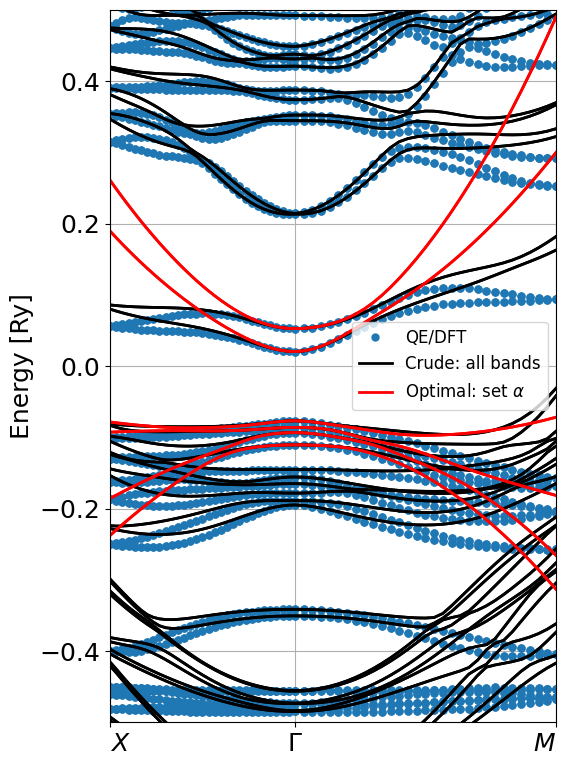

In [8]:
plt.figure(figsize=(6,8))
pdft   = plt.plot(bands.kdist, bands.bands, 'o', c='C0', ms=5)
pcrude = plt.plot(bands.kdist, Efull, c='black', lw=2)
poptim = plt.plot(bands.kdist, Ek, c='red', lw=2)
# set legends for single lines
pdft[0].set_label('QE/DFT')
pcrude[0].set_label('Crude: all bands')
poptim[0].set_label(r'Optimal: set $\alpha$')
plt.legend(fontsize=12)
bands.set_labels_and_limits(ax=plt.gca(), ymin=-0.5, ymax=0.5)
plt.grid()

plt.tight_layout()
basename = 'Figures/' + kp.dftdir.replace('/', '')
plt.savefig(basename + '.svg')
plt.savefig(basename + '.png')
plt.show()

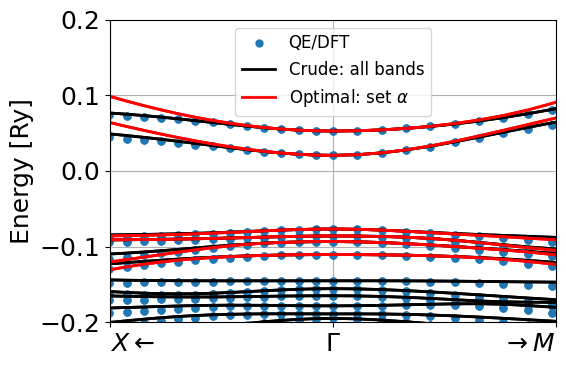

In [9]:
##############################################################
# ZOOM IN
##############################################################

plt.figure(figsize=(6,4))
pdft   = plt.plot(bands.kdist, bands.bands, 'o', c='C0', ms=5)
pcrude = plt.plot(bands.kdist, Efull, c='black', lw=2)
poptim = plt.plot(bands.kdist, Ek, c='red', lw=2)
# set legends for single lines
pdft[0].set_label('QE/DFT')
pcrude[0].set_label('Crude: all bands')
poptim[0].set_label(r'Optimal: set $\alpha$')
plt.legend(fontsize=12)
bands.set_labels_and_limits(ax=plt.gca(), ymin=-0.2, ymax=0.2, xmin=-3*dft2kp.a0, xmax=3*dft2kp.a0)
plt.grid()

plt.tight_layout()
basename = 'Figures/' + kp.dftdir.replace('/', '')
plt.savefig(basename + '-zoom.svg')
plt.savefig(basename + '-zoom.png')
plt.show()

# Verify set alpha

If the user wants to verify if set A (alpha) was chosen correctly, it is useful to plot the DFT bands emphasizing the set A.

In this case, add this steps to step 3 above:

1. Init matplotlib and plotter if necessary. See Plot results section above.
2. Plot the bands and set follwing this example:

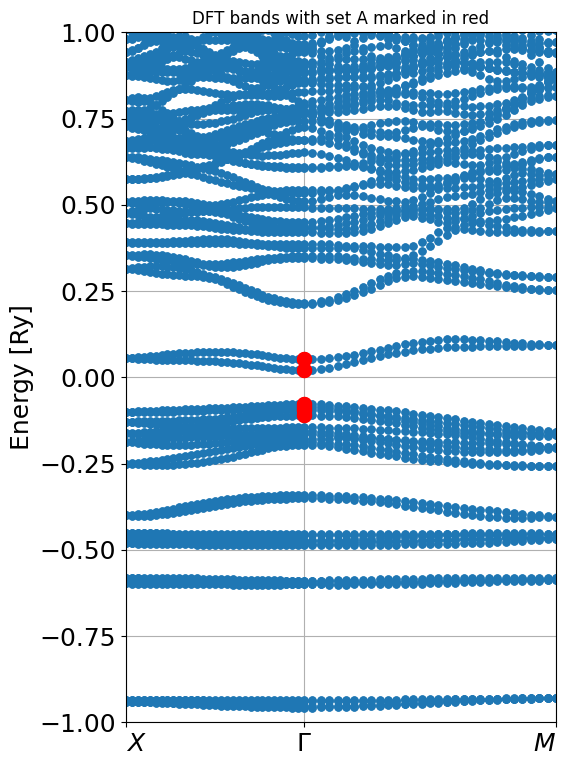

In [10]:
plt.figure(figsize=(6,8))
plt.title('DFT bands with set A marked in red', fontsize=12)
plt.plot(bands.kdist, bands.bands, 'o', ms=5, c='C0') # DFT
# ----------------------
# Emphasize set A in red
plt.scatter([0]*len(setA), bands.en_at_k[setA], c='red', s=100, zorder=10)
# ----------------------
bands.set_labels_and_limits(ax=plt.gca(), ymin=-1, ymax=1)
plt.grid()
plt.tight_layout()
plt.show()

# Verify convergence

To verify the convergence of the parameter as a function of the number of bands, one can redo the folding down with a reduced number of remote bands and plot how the coefficients change as a function of the number of remote bands.

In [11]:
nbands = len(kp.energies)
NBs = np.arange(0, nbands - setA[-1], 5)
cns = []
for NB in NBs:
    # redo fold down using only NB remote bands
    kp.fold_down_H(NB=NB)
    # identify and store list of coefficients
    cns += [list(optimal.getHeff(qs, kp)[0])]
cns = np.array(cns)

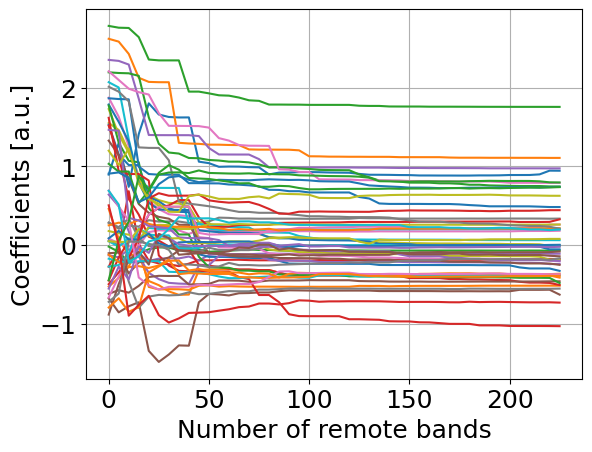

In [12]:
for n in range(cns.shape[1]):
    # only k² or larger powers depend on number of remote bands
    if set(optimal.keys[n]) & set([0, 'x','y','z']):
        continue
    plt.plot(NBs, cns[:,n], label=optimal.keys[n])
# plt.legend(fontsize=10)
plt.xlabel('Number of remote bands')
plt.ylabel(r'Coefficients [a.u.]')
plt.grid()
plt.show()